# Numerical Integration, by `Magomedov Rustam`

As we discussed during the week, differentiation is the technical and always manageable task. In the same time calculation of the definite integral by the **fundamental theorem of calculus** requires _integrability in elementary functions_ (which is not guaranteed at all).

Thus the closest one can get to the estimation of such integral is **numerical approximation**.

We propose you to try yourself in this task following our instructions.

## Quick refresher

Assume that we have some nice smooth function $f(x)$ on a segment $[a,b]$.

To compute definite integral, one should consider tagged partition of the segment:
$$
a=x_0<x_1<x_2<\ldots<x_n=b
$$
with tagging $t_i \in [x_{i-1}, x_i]$. We assume uniform grid:
$$
x_i-x_{i-1}=h
$$
Then Riemann sum is an approximation of the integral:
$$
R(t, h)=\sum_{i=1}^n f(t_i) (x_i-x_{i-1})=h \sum_{i=1}^n f(t_i)
$$

![](pic12.png)

### Task 1. Midpoint rule

Let us start with basic imports: we start with `numpy` and `math` to work with arrays and mathematical functions (for `numpy` introduction and playground you can refer to the last week of our course or your Python course):

In [1]:
import numpy as np
from math import *

Also we import and setup a couple of plotting libraries to make life prettier:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 4.0})
sns.set_palette('cubehelix')

%matplotlib inline

Now we ask you to implement midpoint rule:

![](pic13.png)

In other words: 
$$
t_i=\frac{x_{i-1}+x_i}{2}
$$
$$
\int_a^b f(x)dx \approx \frac{b-a}{n}\sum_{i=1}^n f\left( \frac{x_{i-1}+x_i}{2} \right) 
$$

Write the function
```
def middle(f, a, b, n):
```
that takes as an input function `f` and returns the Riemann sum by midpoint rule:

In [3]:
def middle(f, a, b, n) -> float:
    """
    Takes the function f and returns the Riemann sum by midpoint rule

    :param f: function
    :param a: lower bound
    :param b: upper bound
    :param n: number of intervals

    :returns: Riemann sum by midpoint rule
    """
    # vectorize function
    f = np.vectorize(f)

    # define width of the subintervals
    h = (b-a)/(n-1)

    # define subintervals
    x = np.linspace(a, b, n)

    # midpoint at subintervals
    mid = np.array([(x[1:] + x[:-1])/2])
    
    # sum of midpoints
    I = h * np.sum(f(mid))
    
    return I
    

Run the following cell to get automatic basic check of your function (do not change it!):

In [4]:
import checker
checker.exact_checker(middle)

Test 1  |::|  err= 1.0280911905136136e-05   |::|   time= 0.00025582313537597656 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.0007980231737017007   |::|   time= 0.00011515617370605469 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 2.5233251172984694e-06   |::|   time= 0.00013017654418945312 s
Test 3  |::|  accuracy OK
Passed:  3 /3


### Task 2. Plot the result

Let us also plot a nice picture here. Consider $f(x)=\cos(x)$, $[a,b]=[0, \pi/2]$ and $n=10$. Plot the functions, midpoints, and corresponding reactangles (it is useful to use command `plt.bar`). You should get something like this: 

![](res.png)

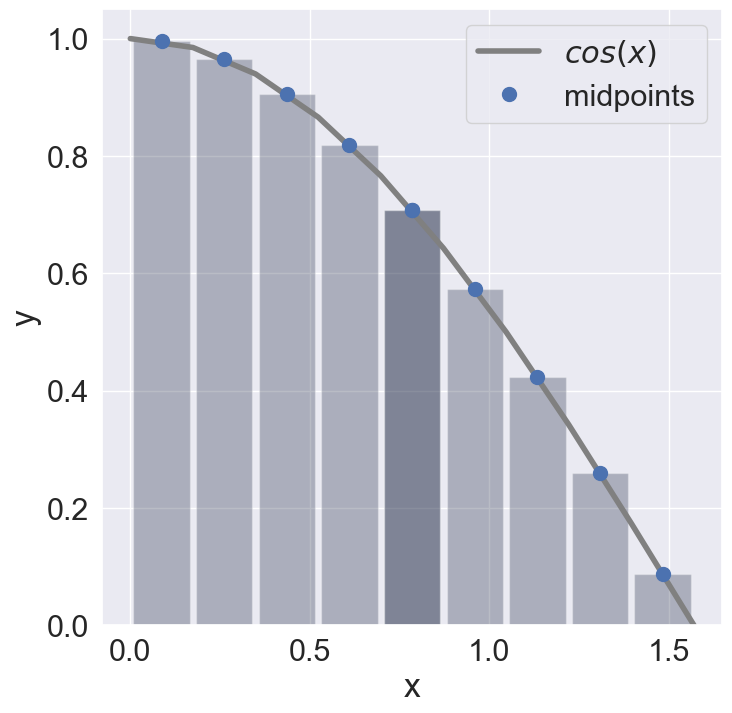

Approximate integral value using midpoint rule: 1.00127036783312


In [5]:
f=np.vectorize(lambda x: np.cos(x))  # vectorized to work with np.linspace; cos->np.cos as it's more accurate, sorry :) 

# defining limits and number of intervals
a = 0
b = np.pi/2
n = 10

# creating evenly spaced intervals
cos_f = np.linspace(a, b, n)

# calculating midpoints
x = np.array([(cos_f[i-1] + cos_f[i]) / 2 for i in range(len(cos_f))])

# calculating function values at midpoints 
h = (b-a)/n

# init plot
plt.figure(figsize=(8, 8))

# cos func plot
plt.plot(cos_f, f(cos_f), color='grey', label='$cos(x)$')

# midpoints plot
plt.plot(x, f(x), 'bo', label='midpoints', markersize = 10)

# rectangles plot
plt.bar(x, f(x), width=h,  alpha=.3)

# axis names
plt.xlabel('x')
plt.ylabel('y')

# legend
plt.legend()
plt.show()

# integral calc, sanity check versus cos(x)=1 integral
I = middle(f, a, b, n)
print(f'Approximate integral value using midpoint rule: {I}')


### Task 3. Trapezoidal rule

The idea here is easily formulated by the picture:
![](pic11.png)
We approximate each segment with trapezoidal area:
$$
\int_a^b f(x)dx=\frac{b-a}{n}\sum_{i=1}^{n} \frac{f(x_{i-1})+f(x_i)}{2}=\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1} f(x_i)\right)
$$
(basically we use the formula for the area of trapezoidal polygon $S=h\cdot(x+y)/2$ where $h$ is the height of the figure and $x$ and $y$ are lengths of parallel sides).

Write the implementation of the formula:

In [6]:
def trapezoidal(f, a, b, n) -> float:
    """
    Takes the function f and returns the Riemann sum by trapezoidal rule
    
    :param f: function
    :param a: lower bound
    :param b: upper bound
    :param n: number of intervals

    :returns: estimated integral value using trapezoidal rule
    """
    f = np.vectorize(f)
    x = np.linspace(a, b, n)
    y = f(x)

    h = (b-a)/(n-1)
    I = h * (np.sum(y) - (y[0] + y[-1])/2)

    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [7]:
checker.exact_checker(trapezoidal)

Test 1  |::|  err= 2.0561760392334705e-05   |::|   time= 0.00017595291137695312 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.0014178308025147857   |::|   time= 7.796287536621094e-05 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 4.802319914176678e-06   |::|   time= 0.00011181831359863281 s
Test 3  |::|  accuracy OK
Passed:  3 /3


### Task 4. Simpson's rule

To proceed with the Simpson's rule, we need to improve on the general idea of Riemann sum approximation. Assume the restriction of the function on a segement $[x_{i-1}, x_i]$: instead of using the definition, one could try to approximate given function by one simpler and easier to integrate. 

Simpson's rule uses approximation by the parabolic function per each segment. In order to it, one needs **three** points -- e.g., $f(x_i)$, $f(x_{i+1}$ and $f\left(\frac{x_{i}+x_{i+1}}{2} \right)$ (the general function is described by $ax^2+bx+c$ with three parameters; following linear algebra's _Rank theorem_, one would need at least three linarly independent equations to find those parameters).
![](pic14.png)
Then approximation can be written as follows:
$$
\int_a^b f(x)dx=\frac{b-a}{3n}\left(\sum_{i=1}^{[n/2]} f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)
$$

Write the implementation of the formula. 

**Note**: the commulitive formula will work for odd $n$ only, that's fine! (It doesn't mean that in the even case Simpson's rule is inadequate; it is just unpleasant to implement).

In [8]:
def simpson(f, a, b, n) -> float:
    """
    Takes the function f and returns the Riemann sum by Simpson's rule

    :param f: function
    :param a: lower bound
    :param b: upper bound
    :param n: number of intervals

    :returns: estimated integral value using Simpson's rule
    """
    f = np.vectorize(f)
    x = np.linspace(a, b, n)
    y = f(x)

    h = (b-a)/(3*(n-1))
    I = h * np.sum(y[0:-2:2] + 4*y[1:-1:2] + y[2::2])
    
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [9]:
checker.exact_checker(simpson)

Test 1  |::|  err= 3.3823588374559677e-10   |::|   time= 0.0001671314239501953 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.0010287667022845781   |::|   time= 9.012222290039062e-05 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 8.022237341087646e-08   |::|   time= 0.0003540515899658203 s
Test 3  |::|  accuracy OK
Passed:  3 /3


## Error estimations

Using **Taylor expansion** of the integrand function, one can establish following estimates of the global errors of the numerical methods.

| **Method** |  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  **Formula**   &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;        | **Error**  |&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     **Constant**    &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  |
|---|:--------------------------:|---|---------|
| _Middle Point_  | $\frac{b-a}{n}\sum_{i=1}^n f\left( \frac{x_{i-1}+x_i}{2} \right) $  |  $\frac{(b-a)^3}{24n^2}C$  | $\max_{[a,b]} |f^{(2)}(x)|$ |
| _Trapezoidal_  | $\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1} f(x_i)\right)$ | $\frac{(b-a)^3}{12n^2}C$  | $\max_{[a,b]} |f^{(2)}(x)|$ |
| _Simpson's rule_  | $\frac{b-a}{3n}\left(\sum_{i=1}^{[n/2]} f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)$ | $\frac{(b-a)^5}{180n^4}C $  | $\max_{[a,b]} |f^{(4)}(x)|$  |

Let us check this formula in terms of adequacy for both included derivative and order of the $n$.

### Task 5. Error and the derivative

Assume $[a,b]=[0,1]$ and $n=100$. Consider the function $f(x)=e^{ax}$ with varying $a$.
1. Compute exact value of the integral $\int_0^1 e^{ax} dx$ analytically (variable `exact`)
2. Compute and plot errors for **trapezoidal rule** with respect to $a$:

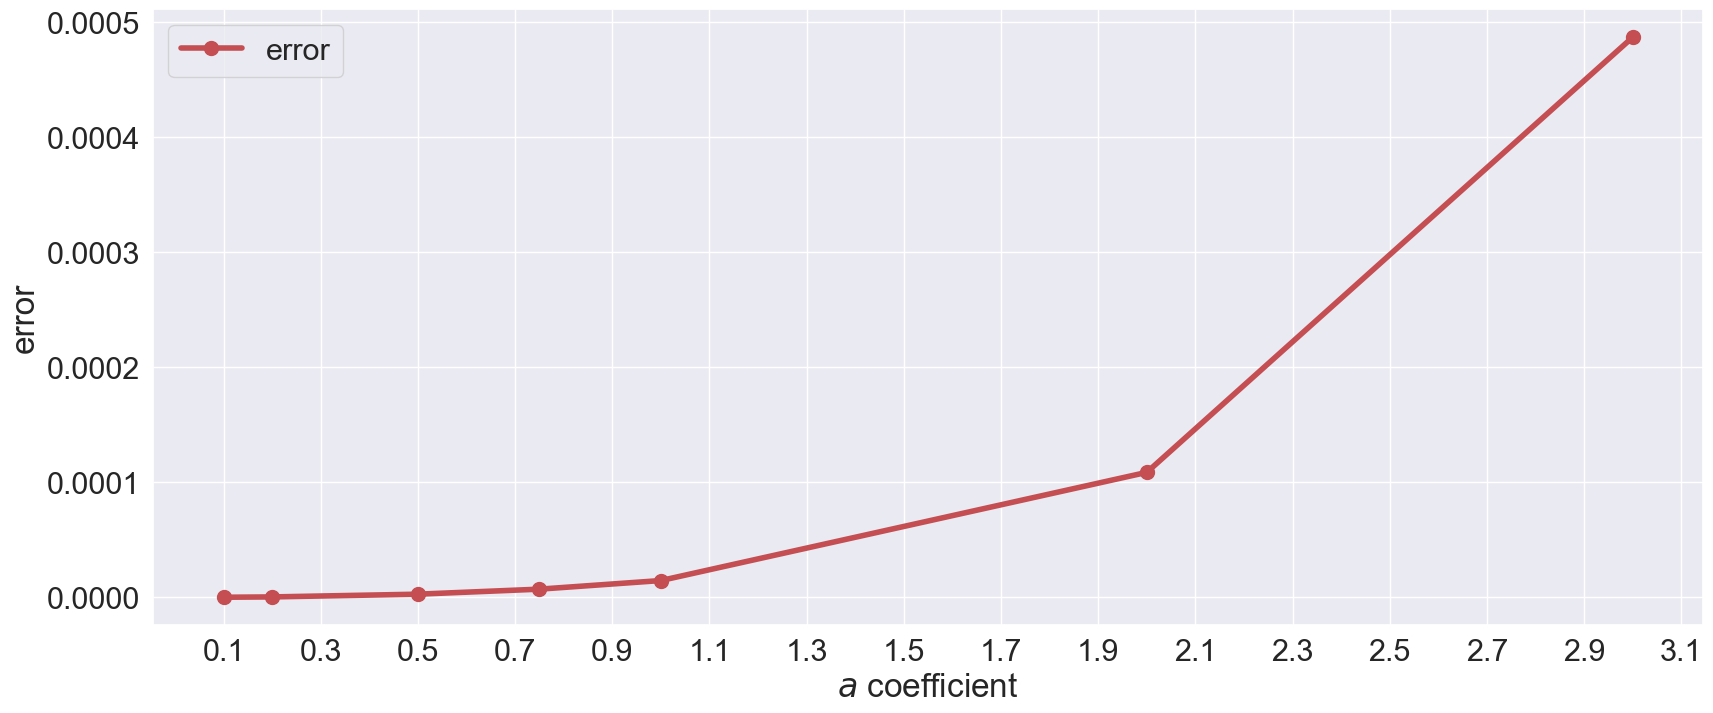

In [10]:
coefs=[0.1, 0.2, 0.5, 0.75, 1.0, 2.0, 3.0]
errs=[]

for coef in coefs:
    f = lambda x: np.e**(coef*x)
    exact = (np.exp(coef) - 1) / coef
    errs.append(abs(exact - trapezoidal(f, 0, 1, 100)))

# plot init
plt.figure(figsize=(20, 8))
plt.plot(coefs, errs, 'ro-', markersize = 10, label='error')

# adjust ticks, add labels, plot
plt.xticks(np.arange(min(coefs), max(coefs)+0.2, 0.2))
plt.xlabel('$a$ coefficient')
plt.ylabel('error')
plt.legend()
plt.show()


### Task 6. Error and number of steps

Assume $[a,b]=[0,\pi/2]$. Consider the function $f(x)=\sin{x}$.
1. Compute exact value of the integral $\int_0^{\pi/2} \sin{x} dx$ analytically (variable `exact`)
2. Compute and plot errors for different values of $n$ for **all three methods**:

In [11]:
# Estimating integral value using 3 methods. I use the function to compare even and odd ns.
def integral_estimate(ns: list):
    """
    Takes the list of n values and returns the list of estimated integral values
    :param ns: list of n values
    """
    for n in ns:
        mid = middle(f, a, b, n)
        trap = trapezoidal(f, a, b, n)
        simp = simpson(f, a, b, n)
        mid_err = mid - exact
        trap_err = trap - exact
        simp_err = simp - exact
        print(f'n = {n}:\n\tMidpoint: {mid}, error: {mid_err}\n\tTrapezoidal: {trap}, error: {trap_err}\n\tSimpson: {simp}, error: {simp_err}\n')

# Errors. Once again, different functions for different list of ns.
def plot_errs(ns : list):
    """
    Plots the error of the midpoint, trapezoidal, simpson rules for a given list of n values

    :param ns: list of n values
    :param subpot_num: number of subplots
    """
    errs_mp=[]
    errs_trap=[]
    errs_simp=[]
    for n in ns:
        errs_mp.append(abs(middle(f, a, b, n) - exact))
        errs_trap.append(abs(trapezoidal(f, a, b, n) - exact))
        errs_simp.append(abs(simpson(f, a, b, n) - exact))

    plt.loglog(ns, errs_mp, 'ro-', markersize = 10, label='midpoint', linewidth=5)
    plt.loglog(ns, errs_trap, 'bo-', markersize = 10, label='trapezoidal', linewidth=5)
    plt.loglog(ns, errs_simp, 'go-', markersize = 10, label='simpson', linewidth=5)
    plt.xlabel('n')
    plt.ylabel('error')
    plt.legend()
    plt.title(f'Error of the mid., trap., simp. methods for different $n$ values. $n$:{ns}')

n = 10:
	Midpoint: 1.0012703678331198, error: 0.0012703678331199564
	Trapezoidal: 0.9974602317917257, error: -0.0025397682082741735
	Simpson: 0.8263560977558315, error: -0.17364390224416837

n = 50:
	Midpoint: 1.000042820266875, error: 4.282026687507656e-05
	Trapezoidal: 0.9999143605663628, error: -8.56394336370414e-05
	Simpson: 0.9679484281080792, error: -0.03205157189192065

n = 100:
	Midpoint: 1.0000104896575936, error: 1.0489657593759638e-05
	Trapezoidal: 0.9999790207508321, error: -2.097924916777405e-05
	Simpson: 0.984134036511716, error: -0.01586596348828384

n = 500:
	Midpoint: 1.000000412883518, error: 4.1288351815271795e-07
	Trapezoidal: 0.999999174233066, error: -8.25766933942873e-07
	Simpson: 0.9968521167689339, error: -0.003147883231065962

n = 1000:
	Midpoint: 1.000000103014312, error: 1.0301431208059597e-07
	Trapezoidal: 0.9999997939713818, error: -2.060286180549653e-07
	Simpson: 0.9984276319524492, error: -0.0015723680475506763

n = 5000:
	Midpoint: 1.0000000041139805, e

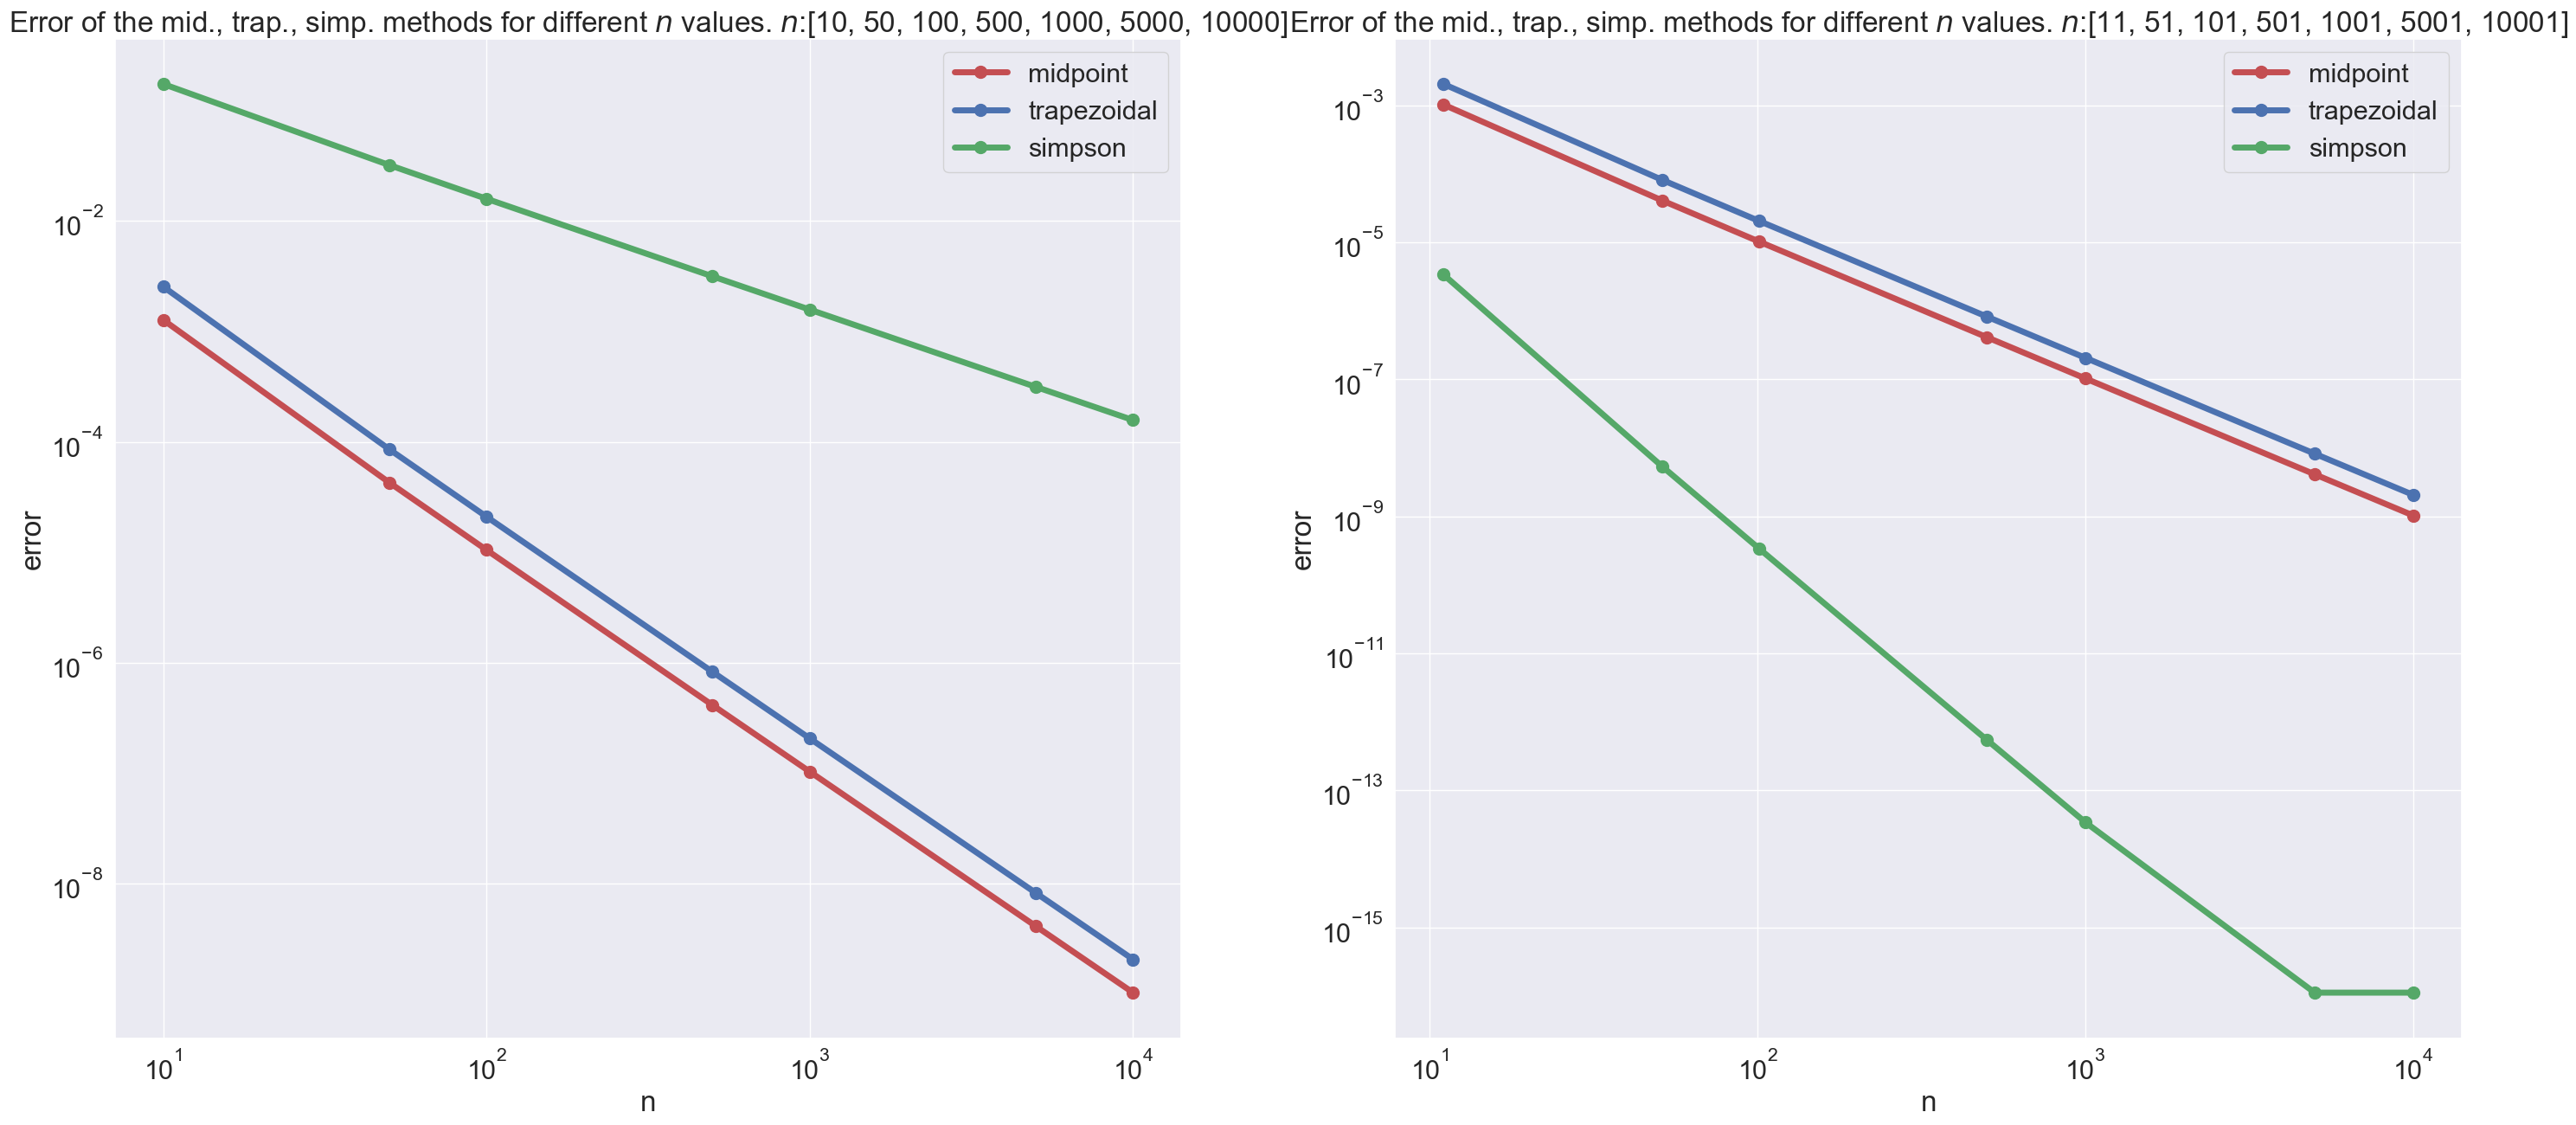

In [12]:
ns_even=[10, 50, 100, 500, 1000, 5000, 10000] 
ns_odd=[11, 51, 101, 501, 1001, 5001, 10001]  #to better estimate how simpsons method performs on odd n

# params
a = 0
b = np.pi/2
f = lambda x: np.sin(x)

# exact value of the integral using numpy
exact = -np.cos(np.pi/2) + np.cos(0)

# calling estimations
integral_estimate(ns_even)
integral_estimate(ns_odd)

plt.figure(figsize=(35, 15))

# plot for even n
plt.subplot(1, 2, 1)
plot_errs(ns_even)

# plot for odd n
plt.subplot(1, 2, 2)
plot_errs(ns_odd)


## Task 7. Results

Answer following questions in the field below:
1. By comparing three method which one is best to use for the function $x^x$?
2. Does estimations of error for $e^{ax}$ coincide with theoretical upper boundary per $a$? If not, where is the problem?
3. Does estimations of error for $\sin {x}$ coincide with theoretical upper boundary per $n$? If not, where is the problem?

`1. By comparing three method which one is best to use for the function` $x^x$`?`

Theoretical assumptions about the behaviour of 3 methods suggest that Simpson's method should behave better with exponential functions. As _Stewart(2019, p.517)_ shows, errors when comparing `Trapezoidal/Midpoint` methods are "opposite in sign" and tend to decrease by a factor of ~4 when the value $n$ is doubled. Using `Simpson's rule`, by comparisson, the error decreases by a factor of 16 _(Stewart, 2019, p.516)_ when $n$ is doubled.
- $\therefore$ for the $x^x$ function, it is best to use the Simpson's method, since it will have the lowest error over larger $n$. Let's prove it by comparing the results of different methods and plotting their errors. 
- Let us then first assume $[a,b]=[0,1]$ and consider $even_n=[1,5,10,20,50,100,100000]$, $odd_n=[11, 51, 101, 501, 1001, 5001, 10001]$.
- Let us calculate the estimations and plot the erorrs using the code below.


n = 3:
	Midpoint: 0.756517115027102, error: -0.026913395685033037
	Trapezoidal: 0.8535533905932737, error: 0.07012287988113874
	Simpson: 0.8047378541243649, error: 0.02130734341222995

n = 5:
	Midpoint: 0.7746355367156301, error: -0.008794973996504862
	Trapezoidal: 0.8050352528101878, error: 0.021604742098052854
	Simpson: 0.7888625402158259, error: 0.005432029503690927

n = 7:
	Midpoint: 0.7789827523786369, error: -0.004447758333498086
	Trapezoidal: 0.7940819489280849, error: 0.010651438215949938
	Simpson: 0.785831031601944, error: 0.0024005208898090213

n = 9:
	Midpoint: 0.7807159774040406, error: -0.002714533308094347
	Trapezoidal: 0.7898353947629091, error: 0.006404884050774107
	Simpson: 0.7847687754138161, error: 0.00133826470168108

n = 11:
	Midpoint: 0.7815888406509572, error: -0.001841670061177747
	Trapezoidal: 0.7877326878323884, error: 0.004302177120253381
	Simpson: 0.7842797123282714, error: 0.0008492016161364413

n = 51:
	Midpoint: 0.78332799347854, error: -0.000102517233595

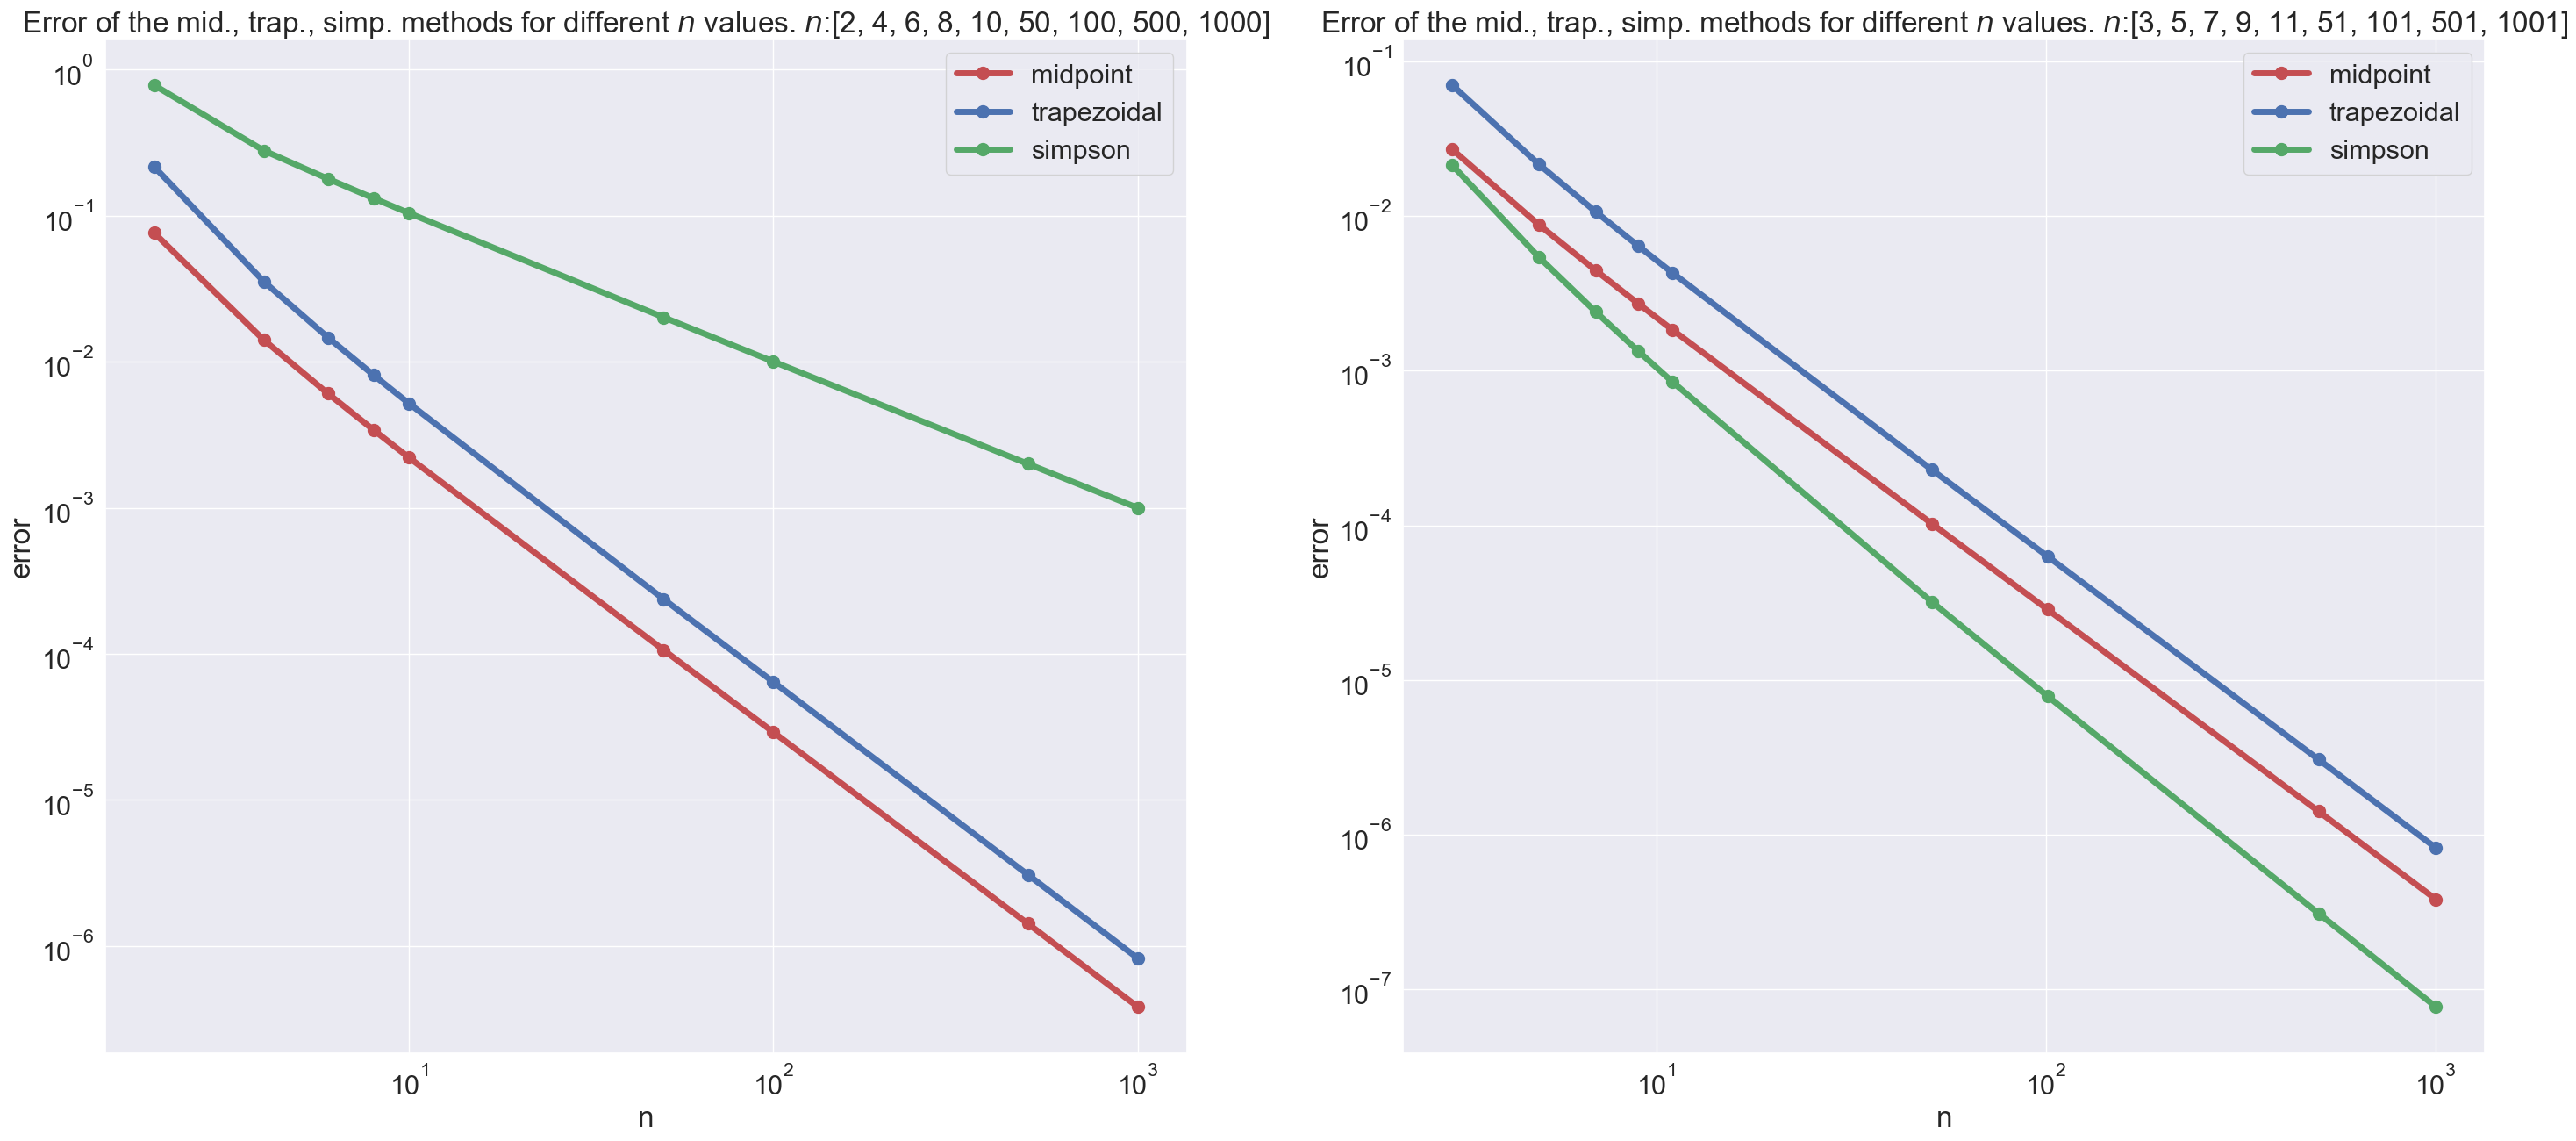

In [13]:
a = 0
b = 1
f = lambda x: x**x
ns_even=[2,4,6,8, 10, 50, 100, 500, 1000]
ns_odd=[3,5,7,9, 11, 51, 101, 501, 1001]

# exact value of the integral rounded to 15 decimal points
exact = 0.783430510712135

# Estimating integral value using 3 methods
integral_estimate(ns_odd)

# plotting errors
plt.figure(figsize=(35, 15))

plt.subplot(1,2,1)
plot_errs(ns_even)

plt.subplot(1,2,2)
plot_errs(ns_odd)


$\therefore$ Simpson's method produce lower error over larger odd $n$, which complies with theoretical expectations. If Simpson's method fails to produce a better approximation, it can be related either to computational complexity over the very large $n$ value or to the underlying processing of floating point. Simpson's function can be modified to be flexible for even values of $n$ if we simply assume $n=n+1$ for cases when $n//2=0$. Over smaller $n$, Simpson's method in general seems more stable and better in approximating the integral value, but with higher error. And as we can see above, the error drops rapidly with the increase of $n$. Midpoint rule in general works OK and is stable as well, while trapezoidal method performs worse than both other methods.

`2. Does estimations of error for` $e^{ax}$ `coincide with theoretical upper boundary per` $a$`? If not, where is the problem?`
- Yes, the estimations coincide with theoretical upper boundary per $a$. We have a static value of $n=100$ intervals, while greater $a$ coefficient each time. So, by the error estimation formula $\frac{(b-a)^3}{12n^2}C$ we expect that higher $a$ induces greater error when the $n$ is static. This behaviour is confirmed by the plot in task 5 - the error grows as $a$ grows.
- It's also worth noting that increase in the interval number $n$ will produce a more precise result, getting closer to the exact value of the integral for $e^{ax}$. This claim is supported by the plot of $f=x^x$ above.

`3. Does estimations of error for` $\sin {x}$ `coincide with theoretical upper boundary per` $n$`? If not, where is the problem?`

- Yes, the error estimation also coincides with theoretical expectations for $f=\sin(x)$. All three methods exibit an expected behaviour - we see a significant drop in error with the increase of number of intervals $n$. 
- It's important to note that for odd values of $n$ Simpson's method resembles the best solution, while for even values of $n$ Simpson's method produces a less acurate estimation compared to midpoint and trapezoidal methods. Once again, this is related to the lower accuracy of the function for even values of $n$, and the reason for that is the nature of the formula. For clarity of the experiment I provide two graphs comparing cases when $n$ is odd and even to show that Simpson's method is still more deisrable when the odd $n$ value condition is satisfied.